# Polarization prism with total internal reflection

This example shows how to perform and subsequently plot a polarization analysis in a prisim with total internal reflection. This notebook depends on the example file _"[Prism using total internal reflection.zmx](Prism%20using%20total%20internal%20reflection.zmx)"_, which is also supplied.

## Included functionalities

* _Sequential mode_:
  - Usage of `zospy.analyses.polarization.transmission()` to perform a polarization transmission analysis.
  - Usage of `zospy.analyses.polarization.polarization_pupil_map` to calculate the polarization pupil map.

## Warranty and liability

The examples are provided 'as is'. There is no warranty and rights cannot be derived from them, as is also stated in the general license of this repository.

## Import dependencies

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import zospy as zp

## Input values

In [2]:
# Input Jones Vector
jx = 1
jy = 1
x_phase = 0
y_phase = 0

## Connect to OpticStudio in standalone mode

In [3]:
zos = zp.ZOS()
oss = zos.connect(mode="standalone")

## Load the optical system

Load the example file 'Prism using total internal reflection'.


In [4]:
# OpticStudio requires absolute paths, but ZOSPy can handle relative paths
oss.load("Prism using total internal reflection.zmx")

## Render the model

To render the model, we use the `zospy.analyses.systemviewers.viewer_3d` function.
For this system, `zospy.analyses.systemviewers.cross_section` cannot be used because the system is not rotationally symmetric.

(-0.5, 1919.5, 1079.5, -0.5)

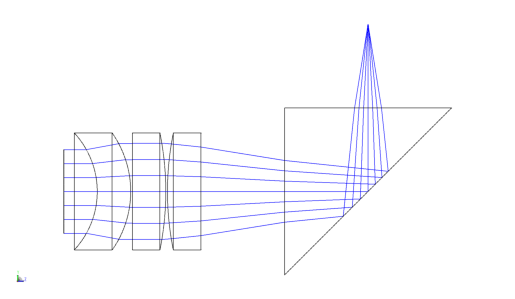

In [5]:
draw3d = zp.analyses.systemviewers.viewer_3d(oss, surface_line_thickness="Thick", ray_line_thickness="Thick", number_of_rays=7, hide_x_bars=True)

plt.imshow(draw3d.Data)
plt.axis("off")

## Transmission analysis

Run the Transmission analysis from `zospy.analyses.polarization.transmission`.

In [6]:
return_transmission = zp.analyses.polarization.transmission(
    oss, jx=jx, jy=jy, x_phase=x_phase, y_phase=y_phase, sampling="64x64"
)

print(
    "Field position     Transmission",
    f"{return_transmission.Data.FieldPos:<18} {return_transmission.Data.TotalTransmission * 100}%",
    sep="\n",
)

Field position     Transmission
0.0                64.1754205%


Get a polarization map using `zospy.analyses.polarization.polarization_pupil_map`

In [7]:
result = zp.analyses.polarization.polarization_pupil_map(
    oss, jx=jx, jy=jy, x_phase=x_phase, y_phase=y_phase, sampling="17x17"
)
df = result.Data.Table

print(df)

        Px     Py        Ex        Ey  Intensity  Phase(Deg)  Orientation
0   -1.000  0.000  0.478226  0.673308   0.682044  137.096154   122.267525
1   -0.875 -0.375  0.505769  0.668042   0.702082  134.067624   123.969140
2   -0.875 -0.250  0.501666  0.666814   0.696309 -225.063934   123.893391
3   -0.875 -0.125  0.496899  0.665856   0.690273 -223.867939   123.809086
4   -0.875  0.000  0.491385  0.665160   0.683897 -222.250933   123.722118
..     ...    ...       ...       ...        ...         ...          ...
192  0.875  0.000  0.672867  0.476981   0.680261 -222.668754   147.755937
193  0.875  0.125  0.678455  0.475828   0.686713 -220.284484   147.700755
194  0.875  0.250  0.684247  0.474248   0.693105 -217.117400   147.589012
195  0.875  0.375  0.690386  0.472140   0.699549  147.216066   147.420181
196  1.000  0.000  0.683282  0.457999   0.676638  136.423377   149.777610

[197 rows x 7 columns]


Plot the pupil map

Text(0.5, 1.0, 'Prism using total internal reflection')

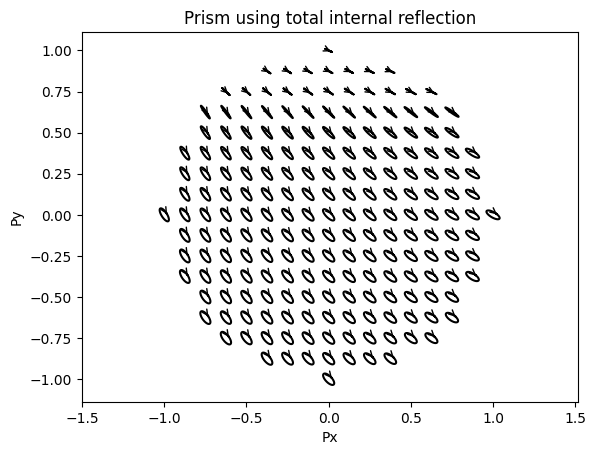

In [8]:
xy_length = len(np.unique(df["Px"]))

for i in range(len(df)):
    # E-field coordinates
    phi = np.linspace(0, 2 * np.pi) - np.pi / 3
    Ex = np.real(df["Ex"][i] * np.exp(1j * phi)) / xy_length + df["Px"].iloc[i]
    Ey = (
        np.real(df["Ey"].iloc[i] * np.exp(1j * phi + 1j * df["Phase(Deg)"].iloc[i] * np.pi / 180)) / xy_length
        + df["Py"].iloc[i]
    )

    # Plot E-field trajectories
    line = plt.plot(Ex, Ey, "k")

    # Add arrows
    line[0].axes.annotate(
        "",
        xytext=(Ex[0], Ey[0]),
        xy=(Ex[1], Ey[1]),
        arrowprops=dict(arrowstyle="->", color="k"),
    )
plt.xlabel("Px")
plt.ylabel("Py")
plt.axis("equal")

plt.title("Prism using total internal reflection")